In [40]:
# Removing Duplicates
# Fixing NULL values(Region,NA_Sales)
# Standardizing categorical values(Country)
# Renaming Columns
# Handling Outliers(Global Sales)

# Create a Bar Chart('National Sales by Region and Country)
# Create Box Plot('Global Sales By Platform)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("dataset.csv")
df.head()

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,NA_Sales,Global_Sales,NA_Profit,Global_Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,$41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,$29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,$15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,$15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,$11.27,31.37,3.381,9.411


In [43]:
df.shape

(5909, 15)

In [44]:
duplicatesDf = df[df.duplicated()]
duplicatesDf.head()

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,NA_Sales,Global_Sales,NA_Profit,Global_Profit
9,9,New Super Mario Bros. Wii,Wii,2010,Sep,Platform,Nintendo,USA,Fairfield,Ohio,East,$14.59,28.62,4.377,8.586
10,9,New Super Mario Bros. Wii,Wii,2010,Sep,Platform,Nintendo,USA,Fairfield,Ohio,East,$14.59,28.62,4.377,8.586
11,9,New Super Mario Bros. Wii,Wii,2010,Sep,Platform,Nintendo,USA,Fairfield,Ohio,East,$14.59,28.62,4.377,8.586
12,9,New Super Mario Bros. Wii,Wii,2010,Sep,Platform,Nintendo,USA,Fairfield,Ohio,East,$14.59,28.62,4.377,8.586
64,60,Super Mario 64,DS,2010,Dec,Platform,Nintendo,United States,Seattle,Washington,West,5.08,10.42,1.524,3.126


In [45]:
df = df.drop_duplicates()
df.head()

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,NA_Sales,Global_Sales,NA_Profit,Global_Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,$41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,$29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,$15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,$15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,$11.27,31.37,3.381,9.411


In [46]:
df.shape

(5893, 15)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5893 entries, 0 to 5908
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           5893 non-null   int64  
 1   Name           5893 non-null   object 
 2   Platform       5893 non-null   object 
 3   Year           5893 non-null   int64  
 4   Month          5893 non-null   object 
 5   Genre          5893 non-null   object 
 6   Publisher      5881 non-null   object 
 7   Country        5893 non-null   object 
 8   City           5893 non-null   object 
 9   State          5893 non-null   object 
 10  Region         5866 non-null   object 
 11  NA_Sales       5893 non-null   object 
 12  Global_Sales   5893 non-null   float64
 13  NA_Profit      5893 non-null   float64
 14  Global_Profit  5893 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 736.6+ KB


In [48]:
df['Region'] = df['Region'].fillna('North')
df[df['Region'].isnull()]

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,NA_Sales,Global_Sales,NA_Profit,Global_Profit


In [49]:
df['NA_Sales'] = df['NA_Sales'].replace('[$]', '', regex=True)

df['NA_Sales'] = pd.to_numeric(df['NA_Sales'], errors= 'coerce')
avarageSales = df['NA_Sales'].mean()

df['NA_Sales'] = df['NA_Sales'].fillna(avarageSales)
 
df.head()

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,NA_Sales,Global_Sales,NA_Profit,Global_Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,11.27,31.37,3.381,9.411


In [50]:
df['Country'] = df['Country'].replace({'USA': 'United States'})
df['Country'] = df['Country'].str.title() # Title to uppercase

df.head()

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,NA_Sales,Global_Sales,NA_Profit,Global_Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,11.27,31.37,3.381,9.411


In [51]:
df[df['Country'] == 'United States'].shape

(2785, 15)

In [52]:
df =  df.rename(columns = {'NA_Sales' : 'National Sales', 
                           'Global_Sales' : 'Global Sales', 
                           'NA_Profit' : 'National Profit', 
                           'Global_Profit' : 'Global Profit'})

df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Month', 'Genre', 'Publisher',
       'Country', 'City', 'State', 'Region', 'National Sales', 'Global Sales',
       'National Profit', 'Global Profit'],
      dtype='object')

In [54]:
# Handle Outliers

salesCap = df['National Sales'].quantile(0.95)
df['National Sales'] = np.where(df['National Profit'] > salesCap, salesCap, df['National Sales'])

df.head()

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,2.07,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,2.07,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,2.07,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,2.07,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,2.07,31.37,3.381,9.411


In [59]:
# Visualization

# Region and Country Vise National Sales

nationlSales = df.groupby(['Region', 'Country'])['National Sales'].sum().reset_index().sort_values(by = 'National Sales', ascending = False)
nationlSales

,Region,Country,National Sales
9,West,United States,902.59
2,East,United States,733.58
8,West,Australia,683.62
0,Central,United States,633.55
7,South,United States,459.86
5,Other,Australia,28.21
4,North,United States,24.49
6,South,Australia,16.30
3,North,Australia,15.24
1,East,Australia,1.35


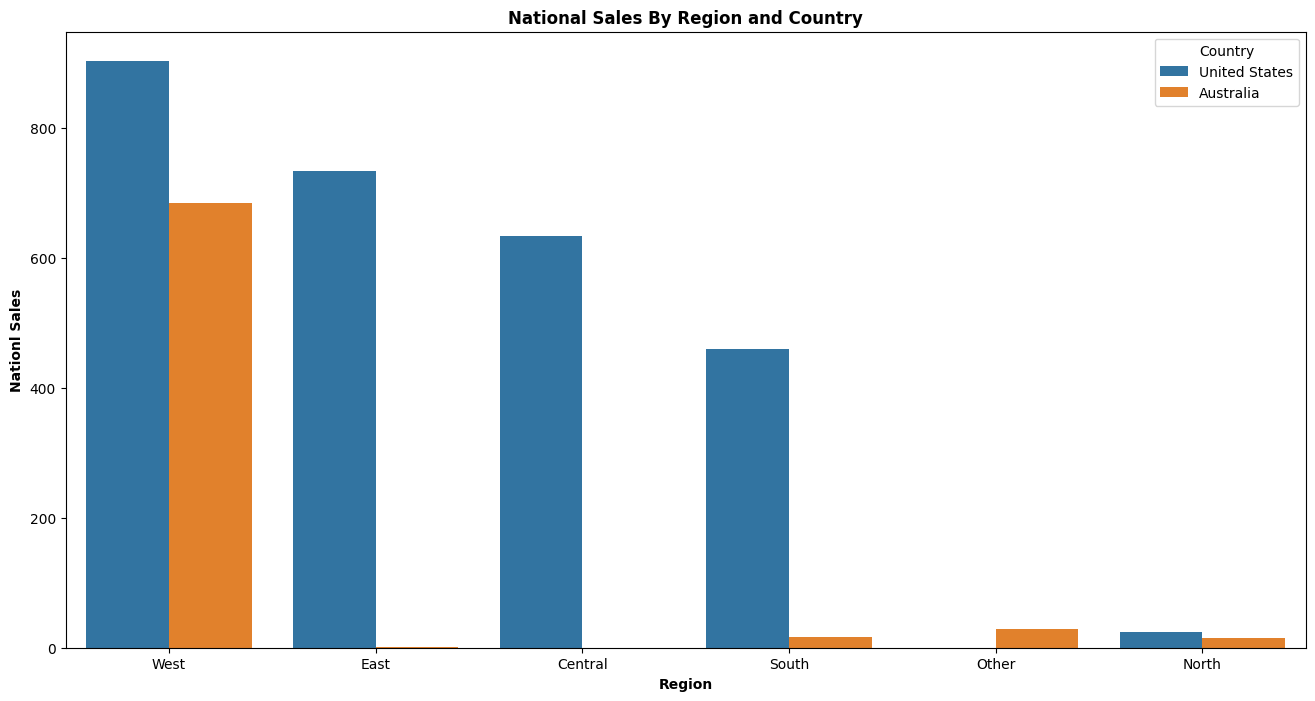

In [66]:
plt.figure(figsize=(16, 8))
sns.barplot(data = nationlSales, x = 'Region', y = 'National Sales', hue = 'Country')

plt.title('National Sales By Region and Country', fontweight = "bold")
plt.xlabel('Region', fontweight = "bold")
plt.ylabel('National Sales', fontweight = "bold")

plt.show()

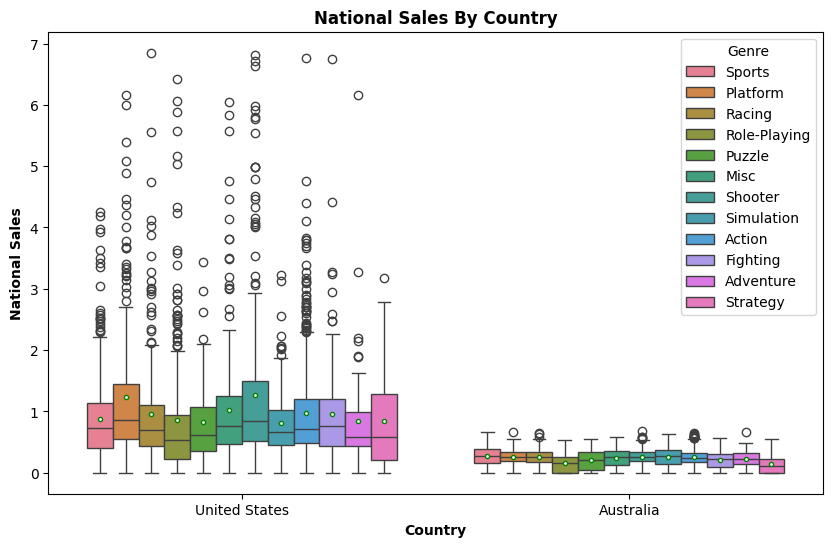

In [72]:
# Box Plot

plt.figure(figsize=(10, 6))

sns.boxplot(x = "Country", y = "National Sales", data = df, showmeans = True, hue = 'Genre', meanprops = {"marker" : "o",
                                                                                                           "markerfacecolor" : "white",
                                                                                                           "markersize" : "3",
                                                                                                           "markeredgecolor" : "green"})

plt.title('National Sales By Country', fontweight = "bold")
plt.xlabel('Country', fontweight = "bold")
plt.ylabel('National Sales', fontweight = "bold")

plt.show()

In [79]:
# Pie Chart

totalSales = df.groupby(['Country'])[['National Sales', 'Global Sales']].sum().reset_index()
totalSales

,Country,National Sales,Global Sales
0,Australia,744.72,1468.25
1,United States,2754.07,6315.68


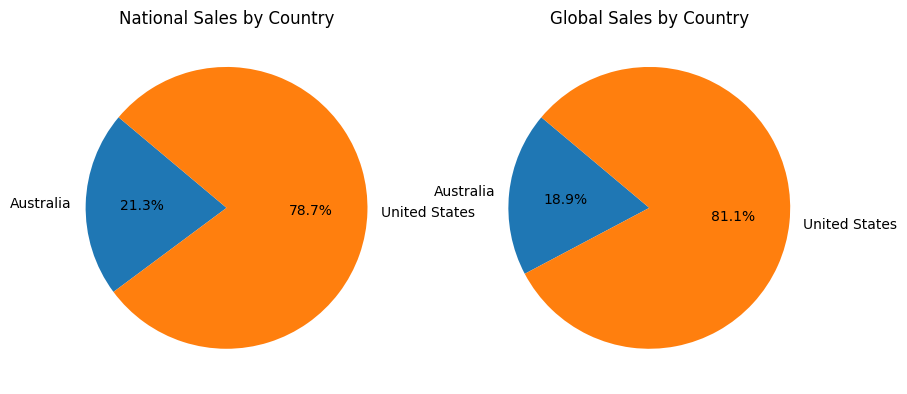

In [81]:
country = totalSales['Country']
nationlSales = totalSales['National Sales']
globalSales = totalSales['Global Sales']

fig, axs = plt.subplots(1, 2, figsize=(10, 7))

axs[0].pie(nationlSales, labels = country, autopct = '%1.1f%%', startangle = 140)
axs[0].set_title('National Sales by Country')

axs[1].pie(globalSales, labels = country, autopct = '%1.1f%%', startangle = 140)
axs[1].set_title('Global Sales by Country')

plt.show()

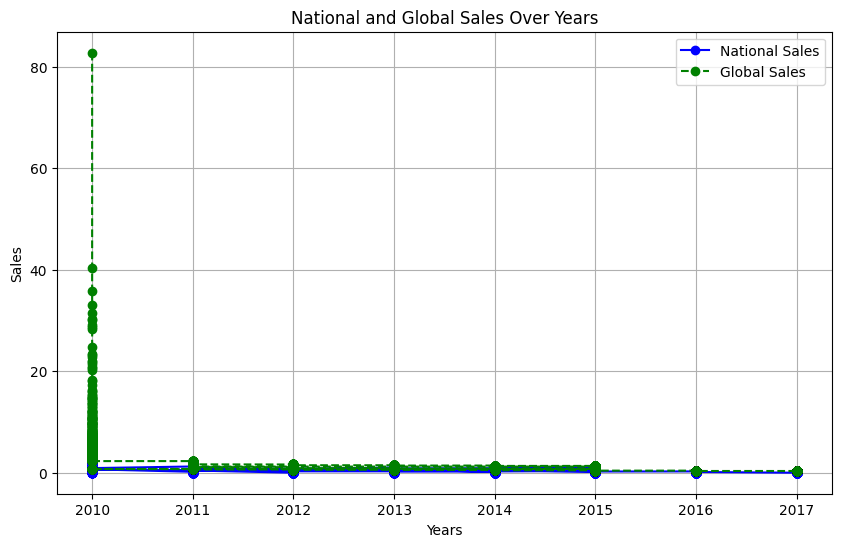

In [84]:
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['National Sales'], marker = 'o', linestyle = '-', color = 'b', label = 'National Sales')
plt.plot(df['Year'], df['Global Sales'], marker = 'o', linestyle = '--', color = 'g', label = 'Global Sales')

plt.title('National and Global Sales Over Years')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.legend()

plt.grid(True)
plt.show()